## Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,random_split,TensorDataset
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
project_name = 'course-project-plant-disease-classification'

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/sample_data'

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [00:42<00:00, 53.9MB/s]
100% 2.70G/2.70G [00:42<00:00, 68.8MB/s]


In [ ]:
!unzip \*.zip && rm *.zipn

Archive:  new-plant-diseases-dataset.zip
replace New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_270deg.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_90deg.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
N
N


In [ ]:
data ='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
os.listdir(data)

['Potato___Early_blight',
 'Peach___Bacterial_spot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___healthy',
 'Pepper,_bell___healthy',
 'Peach___healthy',
 'Cherry_(including_sour)___healthy',
 'Tomato___Early_blight',
 'Strawberry___Leaf_scorch',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Septoria_leaf_spot',
 'Raspberry___healthy',
 'Corn_(maize)___Common_rust_',
 'Apple___Apple_scab',
 'Tomato___Leaf_Mold',
 'Grape___healthy',
 'Potato___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Pepper,_bell___Bacterial_spot',
 'Apple___healthy',
 'Tomato___Bacterial_spot',
 'Squash___Powdery_mildew',
 'Grape___Black_rot',
 'Cherry_(including_sour)___Powdery_mildew',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Potato___Late_blight',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Grape___Esca_(Black_Measles)',
 'Tomato___Target_Spot',
 'Soybean___healthy',
 'Apple___Black_

In [ ]:
os.listdir('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid')

['Potato___Early_blight',
 'Peach___Bacterial_spot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___healthy',
 'Pepper,_bell___healthy',
 'Peach___healthy',
 'Cherry_(including_sour)___healthy',
 'Tomato___Early_blight',
 'Strawberry___Leaf_scorch',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Septoria_leaf_spot',
 'Raspberry___healthy',
 'Corn_(maize)___Common_rust_',
 'Apple___Apple_scab',
 'Tomato___Leaf_Mold',
 'Grape___healthy',
 'Potato___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Pepper,_bell___Bacterial_spot',
 'Apple___healthy',
 'Tomato___Bacterial_spot',
 'Squash___Powdery_mildew',
 'Grape___Black_rot',
 'Cherry_(including_sour)___Powdery_mildew',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Potato___Late_blight',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Grape___Esca_(Black_Measles)',
 'Tomato___Target_Spot',
 'Soybean___healthy',
 'Apple___Black_

## Number of unique plants

In [ ]:
unique_plants = []
cl = os.listdir('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train')
for i in cl:
    x = i.split('_')
    if x[0] not in unique_plants:
        unique_plants.append(x[0])
print("Number of Unique Plants: ",len(unique_plants))
print("Unique Plants: ",unique_plants)

Number of Unique Plants:  14
Unique Plants:  ['Potato', 'Peach', 'Corn', 'Tomato', 'Pepper,', 'Cherry', 'Strawberry', 'Grape', 'Raspberry', 'Apple', 'Orange', 'Squash', 'Soybean', 'Blueberry']


## Loading Training and Test Dataset as Tensor

In [ ]:
transform = transforms.Compose(
    [transforms.Resize(size = 128),
     transforms.ToTensor()])

In [ ]:
dataset = ImageFolder('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',transform=transform)
test_ds = ImageFolder('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',transform=transform)

In [ ]:
print("Number of training images: ",len(dataset))
print("Number of testing images: ",len(test_ds))

Number of training images:  70295
Number of testing images:  17572


## Number of classes

In [ ]:
num_classes = dataset.classes
print("Number of classes: ",len(num_classes))
print(num_classes)

Number of classes:  38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mit

## Visualising a single image

In [ ]:
image, label  = dataset[0]
print("Image shape:",image.shape)
print("Image Label: ",label)
print("Image Label: ",dataset.classes[label])
print(image)

Image shape: torch.Size([3, 128, 128])
Image Label:  0
Image Label:  Apple___Apple_scab
tensor([[[0.6588, 0.6549, 0.6510,  ..., 0.7373, 0.7333, 0.7176],
         [0.6627, 0.6588, 0.6510,  ..., 0.7373, 0.7373, 0.7294],
         [0.6667, 0.6667, 0.6667,  ..., 0.7333, 0.7294, 0.7294],
         ...,
         [0.4118, 0.4039, 0.3961,  ..., 0.4863, 0.4902, 0.4902],
         [0.4000, 0.4078, 0.4000,  ..., 0.4941, 0.4980, 0.4980],
         [0.4000, 0.4039, 0.4000,  ..., 0.4706, 0.4784, 0.4824]],

        [[0.6431, 0.6392, 0.6353,  ..., 0.7255, 0.7216, 0.7059],
         [0.6471, 0.6431, 0.6353,  ..., 0.7255, 0.7255, 0.7176],
         [0.6510, 0.6510, 0.6510,  ..., 0.7216, 0.7176, 0.7176],
         ...,
         [0.3725, 0.3647, 0.3569,  ..., 0.4235, 0.4275, 0.4275],
         [0.3608, 0.3686, 0.3608,  ..., 0.4314, 0.4353, 0.4353],
         [0.3608, 0.3647, 0.3608,  ..., 0.4078, 0.4157, 0.4196]],

        [[0.7725, 0.7686, 0.7647,  ..., 0.8392, 0.8353, 0.8196],
         [0.7765, 0.7725, 0.7647,  

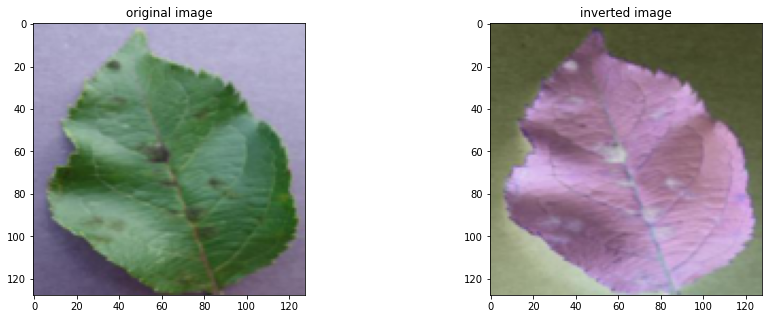

In [ ]:
image, label  = dataset[0]
fig,(ax1,ax2) = plt.subplots(figsize=(15,5),nrows=1,ncols=2)
ax1.imshow(image.permute(1,2,0))
ax1.set_title("original image")
ax2.imshow(1-image.permute(1,2,0))
ax2.set_title("inverted image")
plt.show()

## Validation Dataset and Dataloader

In [ ]:
random_seed = 42
torch.manual_seed(random_seed)

In [ ]:
validation_split = 0.3
val_size = int(len(dataset) * validation_split)
train_size = len(dataset) - val_size

train_ds,val_ds = random_split(dataset,[train_size,val_size])

In [ ]:
batch_size = 64

train_loader = DataLoader(train_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)
val_loader = DataLoader(val_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)
test_loader = DataLoader(test_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)

## Visualising a Batch of images

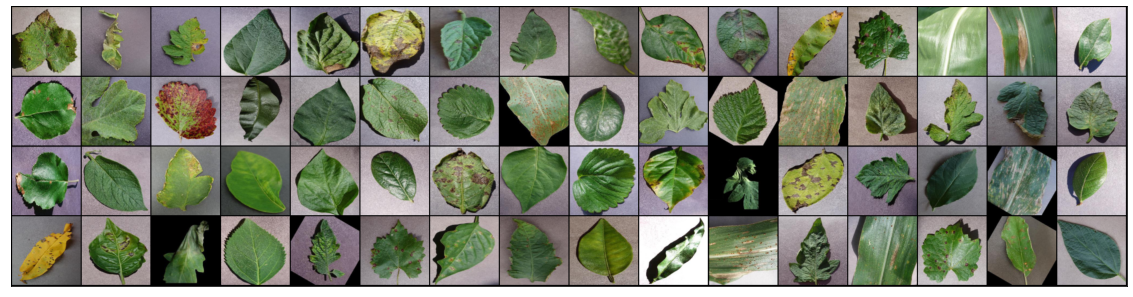

In [ ]:
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

## Building The Model

### Building a Base Image Classification Model

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))


class ImageClassificationBase(nn.Module):
    
  def training_step(self,batch):
    images,labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    return loss

  def validation_step(self,batch):
    images,labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    acc = accuracy(out,labels)
    return {'val_loss':loss,'val_acc':acc}

  def validation_epoch_end(self,outputs):
    batch_loss = [out['val_loss'] for out in outputs]
    epoch_loss = torch.stack(batch_loss).mean()
    batch_acc = [out['val_acc'] for out in outputs]
    epoch_acc = torch.stack(batch_acc).mean()
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}

  def epoch_end(self,epoch,result):
    print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['train_loss'], result['val_loss'], result['val_acc']))

### Buiding a  CNN model 

In [ ]:
class Plant_Disease_Model(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Conv2d(3,32,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 64*64*64

        nn.Conv2d(64,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 128*32*32

        nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 256*16*16
        
        nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(256,512,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 512*8*8
        
        nn.Conv2d(512,512,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(512,1024,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 1024*4*4
        nn.AdaptiveAvgPool2d(1),
        
        nn.Flatten(),
        nn.Linear(1024,512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,38)
        )
    
  def forward(self,xb):
    out = self.network(xb)
    return out

### Building a VGG16 model using Transfer Learning

In [ ]:
class Plant_Disease_Model1(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = models.vgg16(pretrained=True)
    num_ftrs = self.network.classifier[-1].in_features
    self.network.classifier[-1] = nn.Linear(num_ftrs, 38)
    
  def forward(self,xb):
    out = self.network(xb)
    return out

### Building a resnet34 model using Transfer Learning

In [ ]:
class Plant_Disease_Model2(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = models.resnet34(pretrained=True)
    num_ftrs = self.network.fc.in_features
    self.network.fc = nn.Linear(num_ftrs, 38)
    
  def forward(self,xb):
    out = self.network(xb)
    return out

## Training and Evaluation

In [ ]:
@torch.no_grad()
def evaluate(model,val_loader):
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    model.train()
    train_losses = []
    for batch in tqdm(train_loader):
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    result = evaluate(model, val_loader)
    result['train_loss'] = torch.stack(train_losses).mean().item()
    model.epoch_end(epoch, result)
    history.append(result)
  return history

## Using GPU

In [ ]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [ ]:
model = to_device(Plant_Disease_Model2(), device)

In [ ]:
model

Plant_Disease_Model2(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tr

## Training the model

In [ ]:
evaluate(model,val_loader)

{'val_acc': 0.03333333507180214, 'val_loss': 3.8491690158843994}

In [ ]:
history = fit(10, 0.001, model, train_loader, val_loader, opt_func = torch.optim.Adam)


Epoch [0], train_loss: 0.3521, val_loss: 0.5414, val_acc: 0.8465



Epoch [1], train_loss: 0.1276, val_loss: 0.5559, val_acc: 0.8561



Epoch [2], train_loss: 0.0886, val_loss: 0.1504, val_acc: 0.9527



Epoch [3], train_loss: 0.0790, val_loss: 0.0907, val_acc: 0.9714



Epoch [4], train_loss: 0.0522, val_loss: 0.1122, val_acc: 0.9660



Epoch [5], train_loss: 0.0602, val_loss: 0.0827, val_acc: 0.9758



Epoch [6], train_loss: 0.0419, val_loss: 0.2095, val_acc: 0.9447



Epoch [7], train_loss: 0.0474, val_loss: 0.0520, val_acc: 0.9830



Epoch [8], train_loss: 0.0367, val_loss: 0.0924, val_acc: 0.9735



Epoch [9], train_loss: 0.0344, val_loss: 0.1542, val_acc: 0.9585


In [ ]:
history += fit(5, 0.001, model, train_loader, val_loader, opt_func = torch.optim.Adam)


Epoch [0], train_loss: 0.0379, val_loss: 0.1573, val_acc: 0.9546



Epoch [1], train_loss: 0.0319, val_loss: 0.0580, val_acc: 0.9825



Epoch [2], train_loss: 0.0253, val_loss: 0.1314, val_acc: 0.9634



Epoch [3], train_loss: 0.0221, val_loss: 0.1263, val_acc: 0.9640



Epoch [4], train_loss: 0.0217, val_loss: 0.0527, val_acc: 0.9831


## Plotting accuracy and losses

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

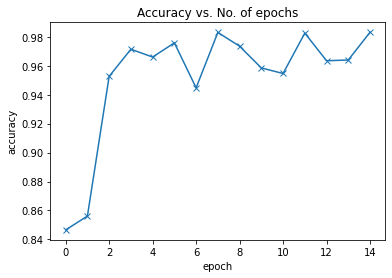

In [ ]:
plot_accuracies(history)

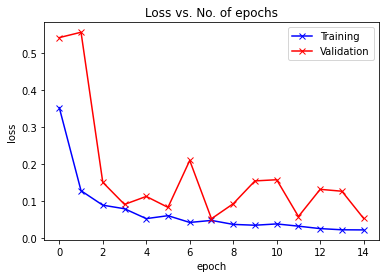

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model,val_loader)

{'val_acc': 0.9831439256668091, 'val_loss': 0.052732281386852264}

## Evaluation and Prediction on Test Data

In [ ]:
x = evaluate(model,test_loader)
x

{'val_acc': 0.9806944727897644, 'val_loss': 0.06161438673734665}

#### **Accuracy of the model on test data : 98.420%**

## Prediction on some single image of test data

In [ ]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return dataset.classes[preds[0].item()]

Label: Apple___Apple_scab , Predicted: Apple___Apple_scab


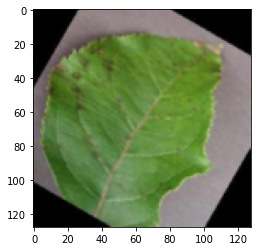

In [ ]:
img, label = test_ds[25]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Apple___Black_rot , Predicted: Apple___Black_rot


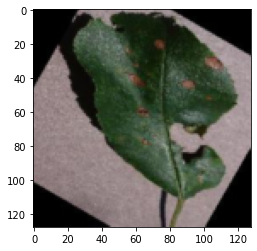

In [ ]:
img, label = test_ds[978]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Cherry_(including_sour)___Powdery_mildew , Predicted: Cherry_(including_sour)___Powdery_mildew


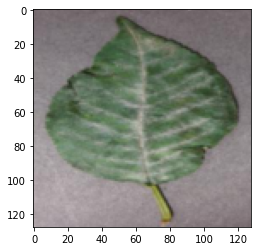

In [ ]:
img, label = test_ds[2548]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

## Saving the Model

In [ ]:
torch.save(model.state_dict(), 'plantDisease-resnet34.pth')